In [1]:
import networkx as nx
import osmnx as ox
# import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
# ox.config(use_cache=True, log_console=True)
ox.__version__

'0.10'

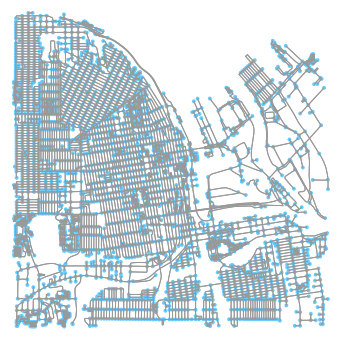

In [2]:
# get a graph for some city
G = ox.graph_from_address('1320 Broadway, Tacoma, WA 98402', network_type='walk', distance = 3000)
fig, ax = ox.plot_graph(G)

In [3]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

33607496.51894145

In [4]:
# see more stats (mostly topological stuff) with extended_stats
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [6]:
# pull up some stat's value
more_stats['radius']

5778.859000000002

In [7]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')

Centrality

In [8]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

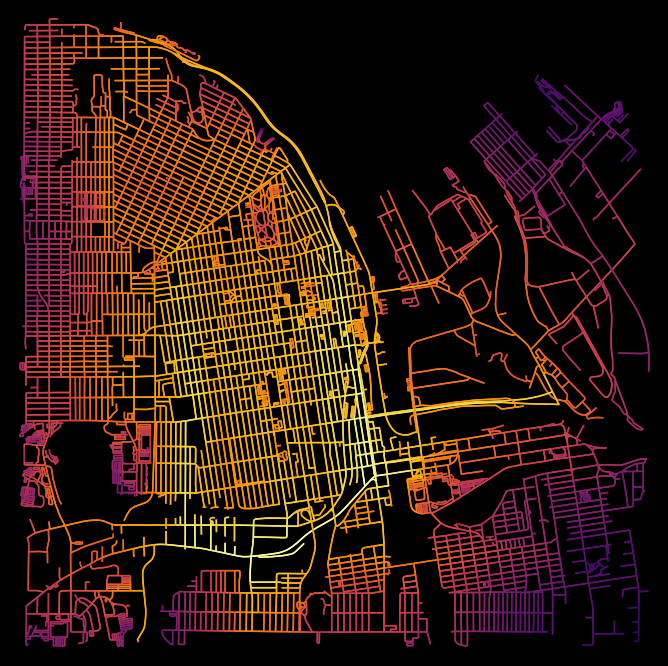

In [9]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, fig_height=12)

Routing

In [10]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (47.2504127,-122.4402852))
dest_node = ox.get_nearest_node(G, (47.2456078,-122.4370638))

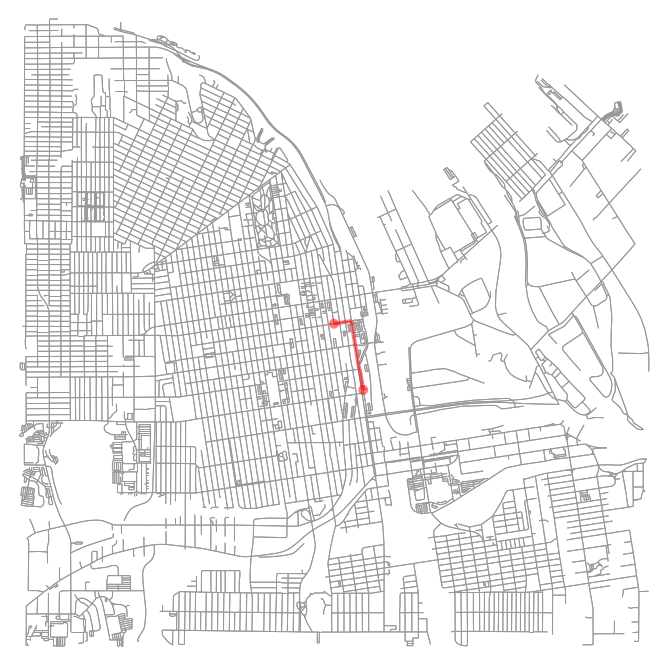

In [11]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0, fig_height = 12)

In [12]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

833.679

In [13]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(G.node[orig_node]['y'], G.node[orig_node]['x'],
                    G.node[dest_node]['y'], G.node[dest_node]['x'])

689.0080568859491

Different ways of querying data

In [ ]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'municipality' : 'Tijuana',
         'state' : 'Baja California',
         'country' : 'Mexico'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

In [26]:
ox.save_graph_shapefile(G, filename='BC_shapefile')

Networks from anywhere in the world

In [ ]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Modena, Italy', network_type='drive_service')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0, edge_linewidth=0.5)

In [ ]:
# or get network by coordinates, bounding box, or any custom polygon shape
# useful when OSM just doesn't have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609 #meters
G = ox.graph_from_point(wurster_hall, distance=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0)

Or other infrastructures

In [ ]:
# get rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should prob download a station adjacency matrix elsewhere
G = ox.graph_from_place('New York City, New York',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        network_type='none', infrastructure='way["railway"~"subway"]')

fig, ax = ox.plot_graph(G, fig_height=10, node_size=0)